# --- Testez notre compteur de doigts ici ! ---

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys
if( '../modules' in sys.path):
    sys.path.remove('../modules')
sys.path.insert(1, '../modules')

from skin_detection_specific import *
from skin_detection_generic import *
from detect_fingers_from_masks import *
from utils import *

from os import listdir
from os.path import isfile, join

In [7]:
def displayResultingImage(input_image_path, DISPLAY):
    # Load image
    print('Input image')
    raw_image = load_and_show_rgb_image(input_image_path)
    plt.pause(0.05)

    # Detect hands mask
    print('Hands mask')
    filtered_image, hands_mask = skin_detection_specific(raw_image)
    plt.imshow(hands_mask, cmap='gray')
    plt.pause(0.05)

    # Detect fingers
    print('Output image')
    fingers_detected, relevant_convexity_defects, contours, filtered_convHull_points = findFingersFromMask(hands_mask, keepBiggestContours=True)
    print('Fingers detected : {}'.format([len(fingers) for fingers in fingers_detected]))
    final_image = raw_image.copy()
    LINE_WIDTH = 1 + int(raw_image.shape[1]*0.01)
    PT_RADIUS = 1 + int(raw_image.shape[1]*0.02)
    PT_BORDER = 1 + int(PT_RADIUS / 6)
    
    if(DISPLAY["contours"]):
        cv2.drawContours(final_image , contours, -1, (0, 255, 0), LINE_WIDTH)
    if(DISPLAY["minimal_hull_convex"]):
        cv2.drawContours(final_image , filtered_convHull_points, -1, (0, 0, 255), LINE_WIDTH)
    if(DISPLAY["relevant_convexity_defects"]):
        for hand in relevant_convexity_defects:
            for defect_point in hand:
                final_image = cv2.circle(final_image, defect_point, PT_RADIUS, [0, 255, 255], PT_BORDER)
    if(DISPLAY["fingers"]):
        for hand in fingers_detected:
            for finger in hand:
                final_image = cv2.circle(final_image, finger, PT_RADIUS, [255, 0, 0], int(PT_BORDER * 1.5))
    plt.imshow(final_image)
    plt.pause(0.05)

In [10]:
DATA_FOLDER = '../data/final_dataset/'
FOLDER_FILES_LIST = []
print('AVAILABLE PICTURES IN DATA FOLDER :')
for f in listdir(DATA_FOLDER):
    if isfile(join(DATA_FOLDER, f)) and ('.jpg' in f or '.jpeg' in f or '.png' in f):
        print(f)
        FOLDER_FILES_LIST.append(DATA_FOLDER + f)

AVAILABLE PICTURES IN DATA FOLDER :
photo_2020-04-13 17.33.15.jpeg
photo_2020-04-13 17.33.20.jpeg
photo_2020-04-13 17.33.22.jpeg
photo_2020-04-13 17.33.35.jpeg
photo_2020-04-13 17.33.37.jpeg
photo_2020-04-13 17.33.43.jpeg
photo_2020-04-13 17.33.46.jpeg
photo_2020-04-13 17.33.48.jpeg
photo_2020-04-13 17.33.51.jpeg
photo_2020-04-13 17.33.55.jpeg
photo_2020-04-13 17.33.57.jpeg
photo_2020-04-13 17.34.06.jpeg
photo_2020-04-13 17.34.10.jpeg


## Testez ici en précisant l'image que vous souhaitez utiliser

../data/final_dataset/photo_2020-04-13 17.33.15.jpeg
Input image


Hands mask


Output image
Fingers detected : [3]


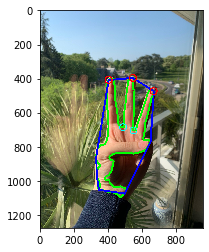

../data/final_dataset/photo_2020-04-13 17.33.20.jpeg
Input image


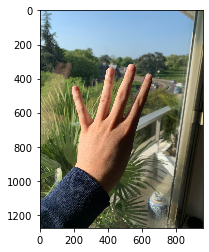

Hands mask


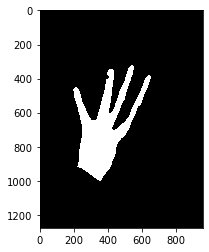

Output image
Fingers detected : [4]


../data/final_dataset/photo_2020-04-13 17.33.22.jpeg
Input image


Hands mask


Output image
Fingers detected : [5]


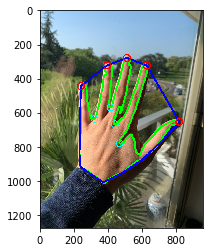

../data/final_dataset/photo_2020-04-13 17.33.35.jpeg
Input image


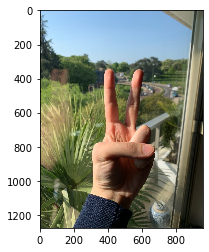

Hands mask


Output image
Fingers detected : [4]


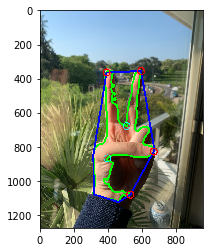

../data/final_dataset/photo_2020-04-13 17.33.37.jpeg
Input image


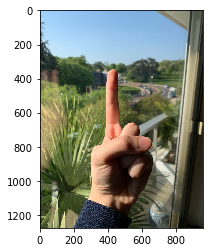

Hands mask


Output image
Fingers detected : [1]


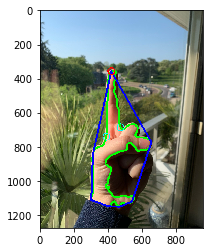

../data/final_dataset/photo_2020-04-13 17.33.43.jpeg
Input image


Hands mask


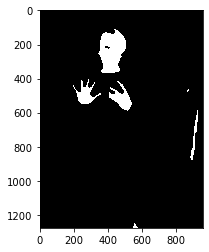

Output image
Fingers detected : [3, 5, 0]


../data/final_dataset/photo_2020-04-13 17.33.46.jpeg
Input image


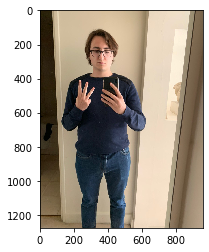

Hands mask


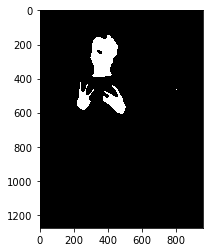

Output image
Fingers detected : [2, 3, 0]


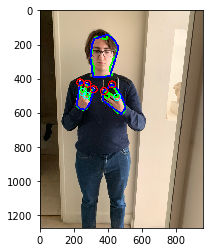

../data/final_dataset/photo_2020-04-13 17.33.48.jpeg
Input image


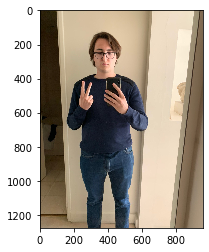

Hands mask


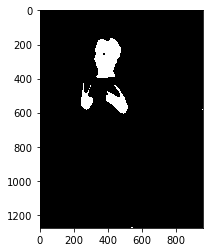

Output image
Fingers detected : [2, 2, 0]


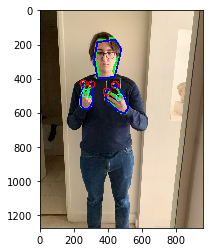

../data/final_dataset/photo_2020-04-13 17.33.51.jpeg
Input image


Hands mask


Output image
Fingers detected : [2, 2, 0]


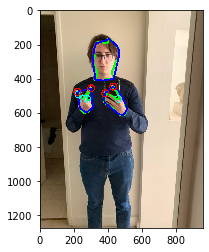

../data/final_dataset/photo_2020-04-13 17.33.55.jpeg
Input image


Hands mask


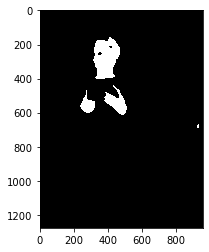

Output image
Fingers detected : [1, 2, 0]


../data/final_dataset/photo_2020-04-13 17.33.57.jpeg
Input image


Hands mask


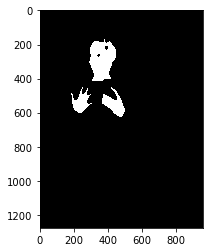

Output image
Fingers detected : [2, 3, 1]


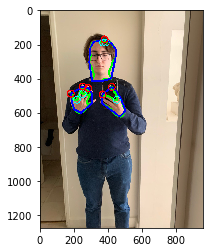

../data/final_dataset/photo_2020-04-13 17.34.06.jpeg
Input image


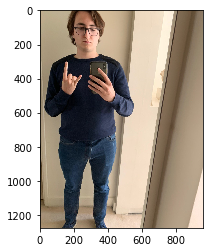

Hands mask


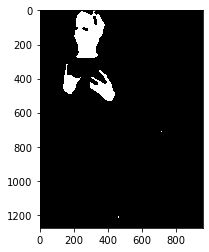

Output image
Fingers detected : [3, 1, 0]


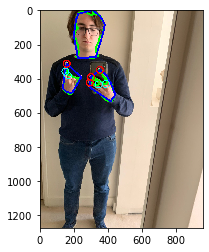

../data/final_dataset/photo_2020-04-13 17.34.10.jpeg
Input image


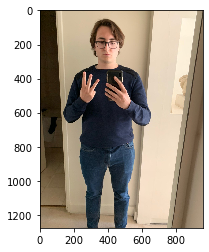

Hands mask


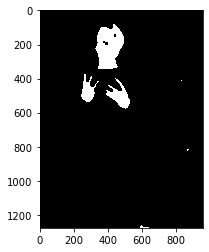

Output image
Fingers detected : [3, 3, 0]


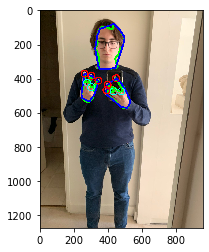

In [11]:
# --- SETUP
FILES_TO_TEST = FOLDER_FILES_LIST

DISPLAY = {
    "fingers": True,
    "relevant_convexity_defects": True,
    "contours": True,
    "minimal_hull_convex": True,
}

for image in FILES_TO_TEST:
    print(image)
    displayResultingImage(image, DISPLAY)